In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
base = pd.read_csv('/content/drive/MyDrive/RedesNeurais/db.csv')

Mounted at /content/drive


In [3]:
df = pd.DataFrame(base)

In [4]:
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [6]:
df.shape

(100, 201)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [9]:
df.isnull().sum().sort_values(ascending=False)

t0         0
t138       0
t128       0
t129       0
t130       0
          ..
t70        0
t71        0
t72        0
t73        0
Classes    0
Length: 201, dtype: int64

In [12]:
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


In [14]:
#função para gerar um df para cada classe
def classes (x):
  dfx = 'df' + 'x'
  dfx = df[df['Classes']==x].T
  dfx.drop('Classes', axis=0,inplace=True)
  dfx.head()
  return dfx

In [15]:
y = df['Classes']

In [16]:
#função para gerar gráfico
def grafico (dfx,classe, y):
  dfx.plot.line(y=y, figsize=(7,3))
  plt.title(f'Gráfico da Classe {classe}')
  plt.xlabel('Sinais Transitórios')
  plt.ylabel('Amplitude')

In [17]:
df1 = classes(1)
df1

,0,1,2,3,26,27,28,29,30,31,32,33,34,35,36,37
t0,24.0,23.0,-0.55,12.3,19.2,15.1,-2.5,24.0,23.0,15.9,-0.55,12.3,15.1,-2.5,19.2,15.9
t1,24.0,23.0,-0.55,10.3,17.2,15.1,-2.5,24.0,23.0,14.9,-0.55,10.3,15.1,-2.5,17.2,14.9
t2,23.0,22.0,-0.55,15.3,26.2,22.1,-3.5,23.0,22.0,22.9,-0.55,15.3,22.1,-3.5,26.2,22.9
t3,25.0,21.0,3.45,15.3,25.2,23.1,-3.5,25.0,21.0,24.9,3.45,15.3,23.1,-3.5,25.2,24.9
t4,24.0,21.0,13.45,16.3,25.2,22.1,-3.5,24.0,21.0,24.9,13.45,16.3,22.1,-3.5,25.2,24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t195,1.0,-1.0,-0.55,-0.7,-0.8,1.1,-0.5,1.0,-1.0,-1.1,-0.55,-0.7,1.1,-0.5,-0.8,-1.1
t196,0.0,0.0,0.45,1.3,0.2,-0.9,0.5,0.0,0.0,0.9,0.45,1.3,-0.9,0.5,0.2,0.9
t197,1.0,-1.0,-0.55,-0.7,-0.8,1.1,-0.5,1.0,-1.0,-0.1,-0.55,-0.7,1.1,-0.5,-0.8,-0.1
t198,0.0,1.0,0.45,1.3,0.2,-0.9,0.5,0.0,1.0,0.9,0.45,1.3,-0.9,0.5,0.2,0.9


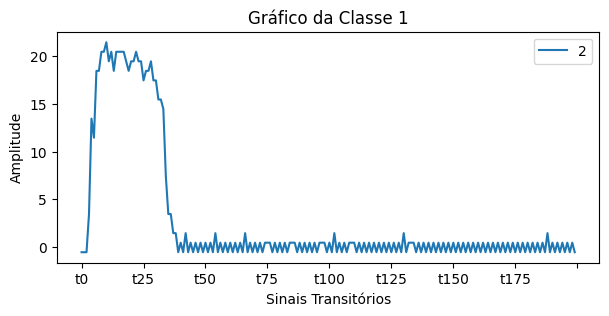

In [18]:
#gráfico classe 1, aparelho selecionado: 2.
grafico1 = grafico(df1,1,2)

In [19]:
df2 = classes(2)
df2

,4,5,6,7,8,38,39,40,41,42,...,45,46,47,48,49,50,51,52,53,54
t0,24.85,-0.35,0.45,4.9,0.1,0.65,0.6,2.7,-10.15,24.85,...,4.9,0.1,1.15,-0.4,0.65,0.6,2.7,-0.4,1.15,-10.15
t1,2.85,-0.35,0.45,5.9,0.1,0.65,-0.4,2.7,-1.15,2.85,...,5.9,0.1,-0.85,1.6,0.65,-0.4,2.7,1.6,-0.85,-1.15
t2,5.85,0.65,1.45,6.9,-0.9,0.65,0.6,0.7,-1.15,5.85,...,6.9,-0.9,0.15,0.6,0.65,0.6,0.7,0.6,0.15,-1.15
t3,-1.15,-0.35,0.45,4.9,0.1,-1.35,-1.4,0.7,0.85,-1.15,...,4.9,0.1,0.15,0.6,-1.35,-1.4,0.7,0.6,0.15,0.85
t4,2.85,0.65,1.45,3.9,0.1,-0.35,0.6,0.7,-0.15,2.85,...,3.9,0.1,0.15,0.6,-0.35,0.6,0.7,0.6,0.15,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t195,-1.15,-0.35,-0.55,-0.1,-0.9,-1.35,0.6,0.7,0.85,-1.15,...,-0.1,-0.9,0.15,1.6,-1.35,0.6,0.7,1.6,0.15,0.85
t196,0.85,0.65,0.45,-0.1,0.1,-0.35,0.6,-1.3,-0.15,0.85,...,-0.1,0.1,0.15,0.6,-0.35,0.6,-1.3,0.6,0.15,-0.15
t197,-0.15,-0.35,0.45,-1.1,0.1,-1.35,-0.4,-0.3,0.85,-0.15,...,-1.1,0.1,-0.85,-0.4,-1.35,-0.4,-0.3,-0.4,-0.85,0.85
t198,0.85,-0.35,0.45,-1.1,1.1,1.65,-0.4,-0.3,-1.15,0.85,...,-1.1,1.1,0.15,-1.4,1.65,-0.4,-0.3,-1.4,0.15,-1.15


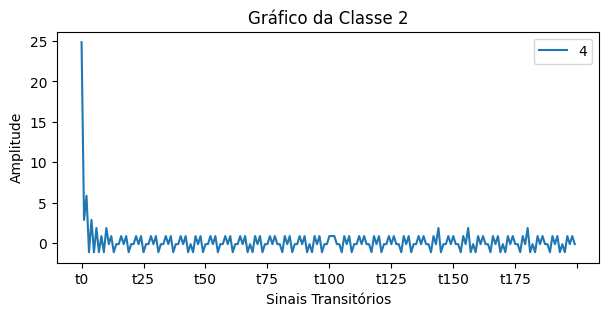

In [21]:
#gráfico classe 2, aparelho selecionado: 4.
grafico2 = grafico(df2,2,4)

In [22]:
df3 = classes(3)
df3

,9,10,11,12,13,14,15,55,56,57,...,68,69,70,71,72,73,74,75,76,77
t0,14.3,15.25,3.55,23.5,22.45,-5.05,11.2,19.8,21.25,23.95,...,7.75,24.0,23.95,19.8,21.25,-4.95,24.0,14.65,7.75,-0.55
t1,11.3,4.25,6.55,21.5,21.45,-2.05,8.2,14.8,19.25,18.95,...,0.75,22.0,18.95,14.8,19.25,25.05,22.0,8.65,0.75,-0.55
t2,8.3,8.25,4.55,21.5,21.45,3.95,9.2,13.8,20.25,17.95,...,0.75,20.0,17.95,13.8,20.25,24.05,20.0,10.65,0.75,-0.55
t3,8.3,4.25,6.55,18.5,19.45,0.95,9.2,12.8,18.25,16.95,...,1.75,17.0,16.95,12.8,18.25,22.05,17.0,10.65,1.75,-0.55
t4,8.3,8.25,6.55,16.5,17.45,2.95,9.2,9.8,18.25,13.95,...,0.75,15.0,13.95,9.8,18.25,21.05,15.0,8.65,0.75,-0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t195,0.3,0.25,-0.45,3.5,0.45,0.95,-0.8,-1.2,0.25,-0.05,...,-0.25,-1.0,-0.05,-1.2,0.25,1.05,-1.0,0.65,-0.25,-0.55
t196,0.3,0.25,1.55,-2.5,1.45,1.95,1.2,3.8,1.25,-1.05,...,0.75,1.0,-1.05,3.8,1.25,-0.95,1.0,0.65,0.75,0.45
t197,1.3,-0.75,-0.45,0.5,-0.55,-0.05,-0.8,0.8,-1.75,-0.05,...,-0.25,-1.0,-0.05,0.8,-1.75,0.05,-1.0,-0.35,-0.25,-0.55
t198,-0.7,0.25,-2.45,-2.5,-0.55,-0.05,0.2,-2.2,-0.75,-0.05,...,-0.25,1.0,-0.05,-2.2,-0.75,-0.95,1.0,-0.35,-0.25,0.45


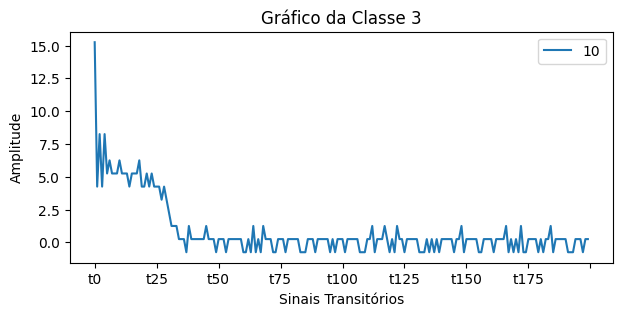

In [23]:
#gráfico classe 3, aparelho selecionado: 10.
grafico3 = grafico(df3,3,10)

In [24]:
df4 = classes(4)
df4

,16,17,78,79,80,81,82,83
t0,9.65,9.2,9.3,6.05,9.65,9.2,6.05,9.3
t1,-1.35,3.2,8.3,1.05,-1.35,3.2,1.05,8.3
t2,2.65,3.2,8.3,3.05,2.65,3.2,3.05,8.3
t3,-1.35,3.2,7.3,1.05,-1.35,3.2,1.05,7.3
t4,0.65,3.2,7.3,4.05,0.65,3.2,4.05,7.3
...,...,...,...,...,...,...,...,...
t195,-1.35,0.2,-1.7,-0.95,-1.35,0.2,-0.95,-1.7
t196,1.65,0.2,0.3,0.05,1.65,0.2,0.05,0.3
t197,-0.35,0.2,-0.7,-0.95,-0.35,0.2,-0.95,-0.7
t198,1.65,0.2,0.3,1.05,1.65,0.2,1.05,0.3


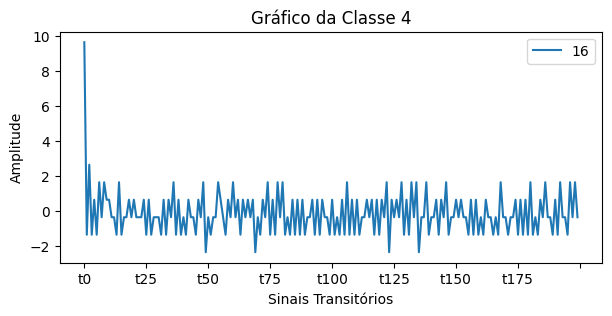

In [25]:
#gráfico classe 4, aparelho selecionado: 16.
grafico4 = grafico(df4,4,16)

In [26]:
df5 = classes(5)
df5

,18,19,20,21,84,85,86,87,88,89,90,91,92,93,94,95
t0,14.35,24.9,25.45,22.05,19.6,14.7,9.25,14.35,24.9,25.45,22.05,25.85,9.25,19.6,25.85,14.7
t1,10.35,23.9,25.45,13.05,5.6,4.7,10.25,10.35,23.9,25.45,13.05,2.85,10.25,5.6,2.85,4.7
t2,5.35,19.9,17.45,8.05,3.6,2.7,3.25,5.35,19.9,17.45,8.05,5.85,3.25,3.6,5.85,2.7
t3,4.35,17.9,17.45,3.05,4.6,-0.3,5.25,4.35,17.9,17.45,3.05,7.85,5.25,4.6,7.85,-0.3
t4,3.35,14.9,20.45,1.05,2.6,0.7,3.25,3.35,14.9,20.45,1.05,3.85,3.25,2.6,3.85,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t195,1.35,0.9,1.45,0.05,1.6,-0.3,0.25,1.35,0.9,1.45,0.05,-2.15,0.25,1.6,-2.15,-0.3
t196,-0.65,-0.1,-0.55,0.05,0.6,0.7,-0.75,-0.65,-0.1,-0.55,0.05,0.85,-0.75,0.6,0.85,0.7
t197,1.35,-0.1,-0.55,0.05,0.6,-1.3,1.25,1.35,-0.1,-0.55,0.05,0.85,1.25,0.6,0.85,-1.3
t198,-0.65,-1.1,-1.55,0.05,-2.4,-1.3,0.25,-0.65,-1.1,-1.55,0.05,1.85,0.25,-2.4,1.85,-1.3


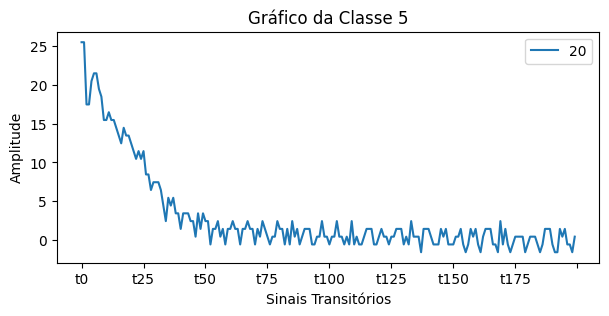

In [27]:
#gráfico classe 5, aparelho selecionado: 20.
grafico5 = grafico(df5,5,20)

In [28]:
df6 = classes(6)
df6

,22,23,96,97
t0,11.55,14.35,11.55,14.35
t1,5.55,4.35,5.55,4.35
t2,2.55,1.35,2.55,1.35
t3,1.55,2.35,1.55,2.35
t4,0.55,-0.65,0.55,-0.65
...,...,...,...,...
t195,0.55,-1.65,0.55,-1.65
t196,-0.45,0.35,-0.45,0.35
t197,0.55,0.35,0.55,0.35
t198,-0.45,0.35,-0.45,0.35


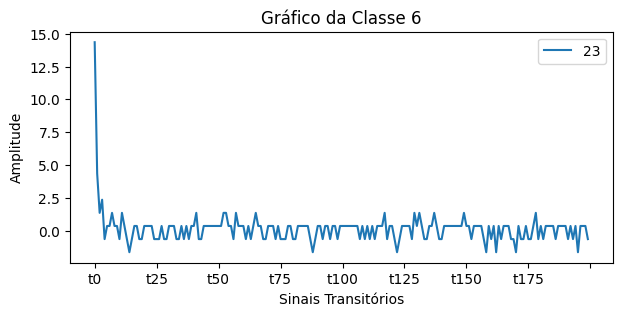

In [30]:
#gráfico classe 6, aparelho selecionado: 23.
grafico6 = grafico(df6,6,23)

In [31]:
df7 = classes(7)
df7

,24,25,98,99
t0,-5.3,22.7,22.7,-5.3
t1,-6.3,-5.3,-5.3,-6.3
t2,-6.3,-0.3,-0.3,-6.3
t3,-6.3,-5.3,-5.3,-6.3
t4,-5.3,-1.3,-1.3,-5.3
...,...,...,...,...
t195,2.7,-0.3,-0.3,2.7
t196,1.7,0.7,0.7,1.7
t197,-0.3,-2.3,-2.3,-0.3
t198,-0.3,0.7,0.7,-0.3


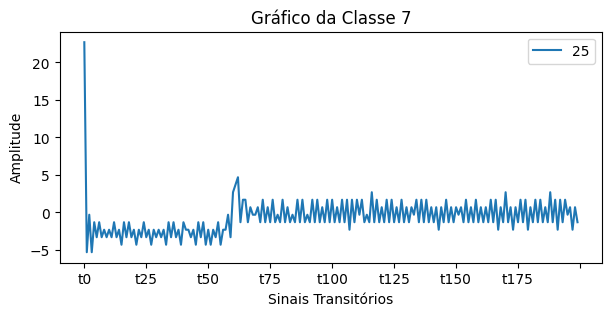

In [32]:
#gráfico classe 7, aparelho selecionado: 25.
grafico7 = grafico(df7,7,25)

In [37]:
# Treino e Teste

x = df.drop('Classes',axis=1)
y= df['Classes']
x, y = make_classification(n_samples=100, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [38]:
x_train.shape

(70, 20)

In [39]:
x_train[0]

array([ 1.57546791,  0.82300836,  0.04037143, -0.50897228, -0.45611756,
       -0.5425696 ,  0.90399917,  1.42361443, -0.97989025, -0.16648595,
        1.2066079 ,  1.06897162, -0.26632688, -1.06633261, -1.23950074,
       -1.33520272, -0.15699367, -2.79099641, -0.28286355, -0.10646012])

In [40]:
y_train.shape
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0])

In [46]:
# Padronização
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Rede Neural

*   **hidden_layer_size** = número de neurônios, número de camadas.
*   **learning_rate_init** = taxa de aprendizado para autualização do peso.
*   **max_inter** = número máximo de interações.
*   **batch_size** = processamento de dados em lotes para atualização dos pesos, otimizando a cada interação.

**Problema:**

* Eu tenho 200 entradas.
* 7 classes.
* Problema multiclasses.

**Estratégia:**
* Iniciar o número de camadas com 2 (hidden_layer_size) e ir dobrando (4,8,16,32,64,128,256,512,1024) ate não ter uma diminuição do erro(loss).
Resultado: melhor resultado hidden_layer_size=128, termina em 32 iterações, com loss 0.29 e validação 1.
* Determinei a interação(max_inter) em 200, visto que o problema apresentava 200 entradas. 
* Número de camadas e de interações definido, introduzir o Batch_size (início com 1, testado até 3).
* Melhor resultado: hidden_layer_size=128, max_inter=200, batch_size=1: 13 iterações, loss 0.02 e validação 1.




In [85]:
clf = MLPClassifier(random_state=42,hidden_layer_sizes=128,learning_rate_init=0.001, max_iter=200, batch_size=1,
                    verbose=True,early_stopping = True).fit(x_train, y_train)

Iteration 1, loss = 0.58166857
Validation score: 0.857143
Iteration 2, loss = 0.37500347
Validation score: 1.000000
Iteration 3, loss = 0.26444043
Validation score: 1.000000
Iteration 4, loss = 0.18987839
Validation score: 1.000000
Iteration 5, loss = 0.14464318
Validation score: 1.000000
Iteration 6, loss = 0.11046600
Validation score: 1.000000
Iteration 7, loss = 0.08581002
Validation score: 1.000000
Iteration 8, loss = 0.06844560
Validation score: 1.000000
Iteration 9, loss = 0.05588667
Validation score: 1.000000
Iteration 10, loss = 0.04566683
Validation score: 1.000000
Iteration 11, loss = 0.03856130
Validation score: 1.000000
Iteration 12, loss = 0.03304617
Validation score: 1.000000
Iteration 13, loss = 0.02803713
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


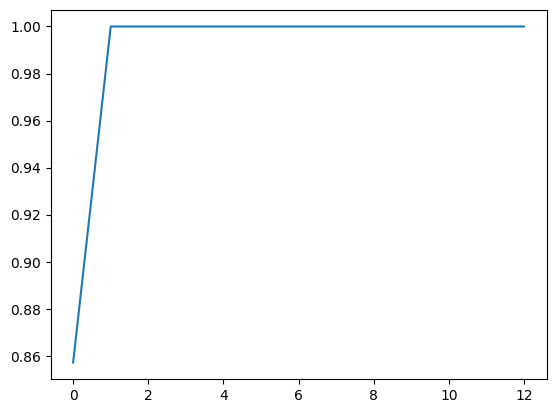

In [90]:
# Gráfico Validação
plt.plot(clf.validation_scores_)

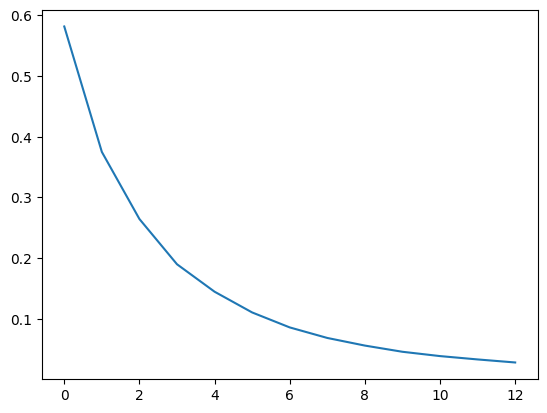

In [91]:
# Gráfico Loss Curve
plt.plot(clf.loss_curve_)

In [95]:
# Precisão média dos dados de treino:
clf.score(x_train, y_train)

0.9714285714285714

In [96]:
# Precisão média dos dados de teste:
clf.score(x_test, y_test)

0.9666666666666667

# Conclusão:
Para o conjunto de dados trabalhados, referente a aparelhos eletrodomésticos, o processo de rede neural exibiu resultados adequados, retratando uma queda no erro e aumento da validação, conforme resultados apresentados acima. Acreditanto ser esse o objetivo, o projeto é dado como encerrado.